# Annotation of the Hybrid Whiptail A. neomexicanus Genome

## Description

This project is an attempt at annotating the hybrid genome of A. neomexicanus, offspring of A. marmoratus and A. inornatus.  Unforunately, no true genome assembly exists for A. neomexicanus due to its hybrid nature.  The two subgenomes that compose the hybrid genome are highly similar so assembly is very difficult without the use of long reads. Even a Hi-C assembly was unable to produce a chromosomal level assembly with 46 scaffolds.  For this reason, it is more logical to annotate the two ancestral species genomes (they are still extant today) for which we have high quality Hi-C genomes assembled.  By concatenating these two subgenomes we have a representative genome of A. neomexicanus.  It is important to note there are a few flaws in this approach.  A. neomexicanus was believed to have been created in a single hybridization event.  Two major pieces of evidence support this theory: the population of A. neomexicanus is one large, continuous population.  If the hybridization occured numerous times we would expect an inconsistent distribution of where they are found. In addition, a skin grafting study found that individuals from different regions could accept skin grafts from each other supporting the idea they all arose from the same ancestral population.  This is however, a hypothesis and has not yet been proven.  Regardless, the issue with this annotation approach is due to the evolutionary differences between the two species.  It can be assumed that the genomes of the two parental species has evolved since the hybridization event and that the common-day genomes are only a representation of what they looked like during the hybridization. In addition, we can expect the genome of A. neomexicanus to have undergone evolutionary changes, particularly since it is a hybrid and there were most likely genome genome interactions during the early stages of hybridization.  However, while not perfect this annotation will hopefully provide a framework for future, better annotations when a genome is completed for A. neomexicanus.  

AUGUSTUS Comparative Gene Prediction (version 3.4.0), further refered to as AUGUSTUS-CGP, is a software utilizing AUGUSTUS' Gene Prediction algorithms to annotate two genomes simultaneously.  The software requires the genomes to be aligned prior to annotation and a phylogenetic tree be included.  The software can annotate multiple genomes simultaneously under the assumption that genomes more closely related, will share a higher degree of similarity in their protein sequence and the intronic/exonic structure of the gene.  AUGUSTUS-CGP also utilizes RNA Hints in order to determine intron locations.

Annotation quality can be measured multiple ways; however the easiest is in comparison to a reference annotation.  Unfortunately, no such reference annotation exists so more creative means of measuring annotation quality were utilized.  In order to assess annotation completeness BUSCO, on the Sauropsida Lineage was conducted.  The annotation was also searched for 41 hox genes previously documented in Anolis Carolinensis.  In order to compare other annotation quality metrics, the annotation of A. inornatus and A. marmoratus were compared to each other searching for allele pairs via reciprical best hit blast and analyzing the difference in length between predicted allele pairs and their percent similarity at the protein level and percent identity at the transcript level.  In addition, dot plots were created to monitor the synteny of said allele pairs.

The Final Annotation can be found in the following directory:
/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/FINAL_ANNOTATION/

*Note: Due to the way AUGUSTUS simultaneously annotates both genomes the prefixes Ino_ and Marm_ were added before their respective Chromosome Names. At various stages throughout the pipeline these prefixes were either added or removed. For simplicity, these commands are not included in the below script but are shown here.  
sed 's/Ino_Chr_/Chr_/' \<file>  
sed 's/Marm_Chr_/Chr_/' \<file>*

## Brief results

|Species|Number of Genes (Raw)|Number of Genes (Final)|BUSCO Completeness (Vertebrata)|Genes with Functional Identification|
|-|-|-|-|-|
|Ino|47,642|29,351|83.9%|19,634|
|Marm|45,146|37,174|83.2%|19,634|


In [32]:
#misc imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.collections import BrokenBarHCollection
from matplotlib.gridspec import GridSpec

## Genome Assembly Statistics

In order for any annotation software to accurately annotate a genome, the reference genome must be of high quality.  Using Hi-C Sequencing techniques, high quality reference genomes were produced for both A. inornatus and A. marmoratus.  Statistics on the assembly were collected using the stats.sh script found in BBMap package version 38.87.  Vertebrata lineage BUSCO version 5.0.0 was conducted on both genomes.

|Assembly|Contigs (n)|Scaffolds (n)|Gaps (Gb, %)|Contig N50 (Kb)|Scaffold N50 (Mb)|Assembly Size (Gb) | BUSCO %C|
|-|-|-|-|-|-|-|-|
|Inornatus Hi-C|88,819|3,150|0.03 (1.087%)|34.116|106.147|1.528|94.9%|
|Marmoratus Hi-C|170,667|3,519|9.30 (5.671%)|17.774|113.087|1.640|95.7%|

In [1]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/INO/ino_vert_busco.srun


#!/bin/bash
#SBATCH --job-name ino_busco
#SBATCH -A m2_jgu-tipton 
#SBATCH -C anyarch 
#SBATCH -p parallel 
#SBATCH -N 1
#SBATCH -c 1
#SBATCH --mem=100G
#SBATCH --time 5-00:00:00
#SBATCH --output ino_vert_busco.out
#SBATCH --error ino_vert_busco.err


module purge


module purge
module load bio/BUSCO/5.0.0-foss-2020b
downloads='/lustre/miifs03/scratch/m2_jgu-tipton/SOFTWARE/busco_downloads/'
export AUGUSTUS_CONFIG_PATH=/home/ndeimler/Augustus/config/

/usr/bin/time -v busco -i ./a_inornatus_100Kb_HiC_assembly_MAY_2021.fasta  -l vertebrata_odb10 -o ino_vert_busco -m genome --offline --download_path $downloads --augustus -c 1


In [3]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/MARM/marm_vert_busco.srun

#!/bin/bash
#SBATCH --job-name marm_busco
#SBATCH -A m2_jgu-tipton 
#SBATCH -C anyarch 
#SBATCH -p parallel 
#SBATCH -N 1
#SBATCH -c 1
#SBATCH --mem=100G
#SBATCH --time 5-00:00:00
#SBATCH --output marm_vert_busco.out
#SBATCH --error marm_vert_busco.err


module purge


module purge
module load bio/BUSCO/5.0.0-foss-2020b
downloads='/lustre/miifs03/scratch/m2_jgu-tipton/SOFTWARE/busco_downloads/'
export AUGUSTUS_CONFIG_PATH=/home/ndeimler/Augustus/config/

/usr/bin/time -v busco -i ./a_marmorata_unmaskedDoveTail_chromosomeLevel_MAY_2021.fasta -l vertebrata_odb10 -o marm_vert_busco -m genome --offline --download_path $downloads --augustus -c 1


## Genome Alignment

Minimap2 version 2.17 is a fast versatile aligner that was used to align the Inornatus and Marmoratus Genomes with a gap open penalty of 3, a gap extension pentaly of 1 a matching score of 50 and a mismatching penalty of 1. Due to the nature of the dissimilarity of the genomes a very large match score must be used with small penalties for mismatches or gaps.  The alignment was then verified by creating a circos plot and checking for known synteny. This circos plot was generated using the bundlelinks function within the circos published tools.


In [4]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/RAW_ANNOTATION/alignment.srun

#!/bin/bash
#SBATCH --job-name aln_12_paf                         ## job name
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel                                               ## Partition name
#SBATCH -N 1
#SBATCH -c 1                                                 ## number of processors
#SBATCH --mem=275G                                    ## memory required M for megs, G for gigs
#SBATCH --time 5-00:00:00                              ## time (HH:MM:SS)
#SBATCH --output minimap_paf_12.out                ## STDOUT
#SBATCH --error minimap_paf_12.err                     ## STDERR


ref_fa="/lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/a_inornatus_100Kb_HiC_assembly_MAY_2021_named.fasta"
asm_fa="/lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/a_marmorata_unmaskedDoveTail_chromosomeLevel_MAY_2021_named.fasta"

module purge
module load bio/minimap2/2.17-GCCcore-9.3.0

/usr/bin/time -v minimap2 -B 1 -A 50 -O 3,3 -E 1,1 --cs=long -cx asm5 $ref_fa $asm_fa > aln.sam


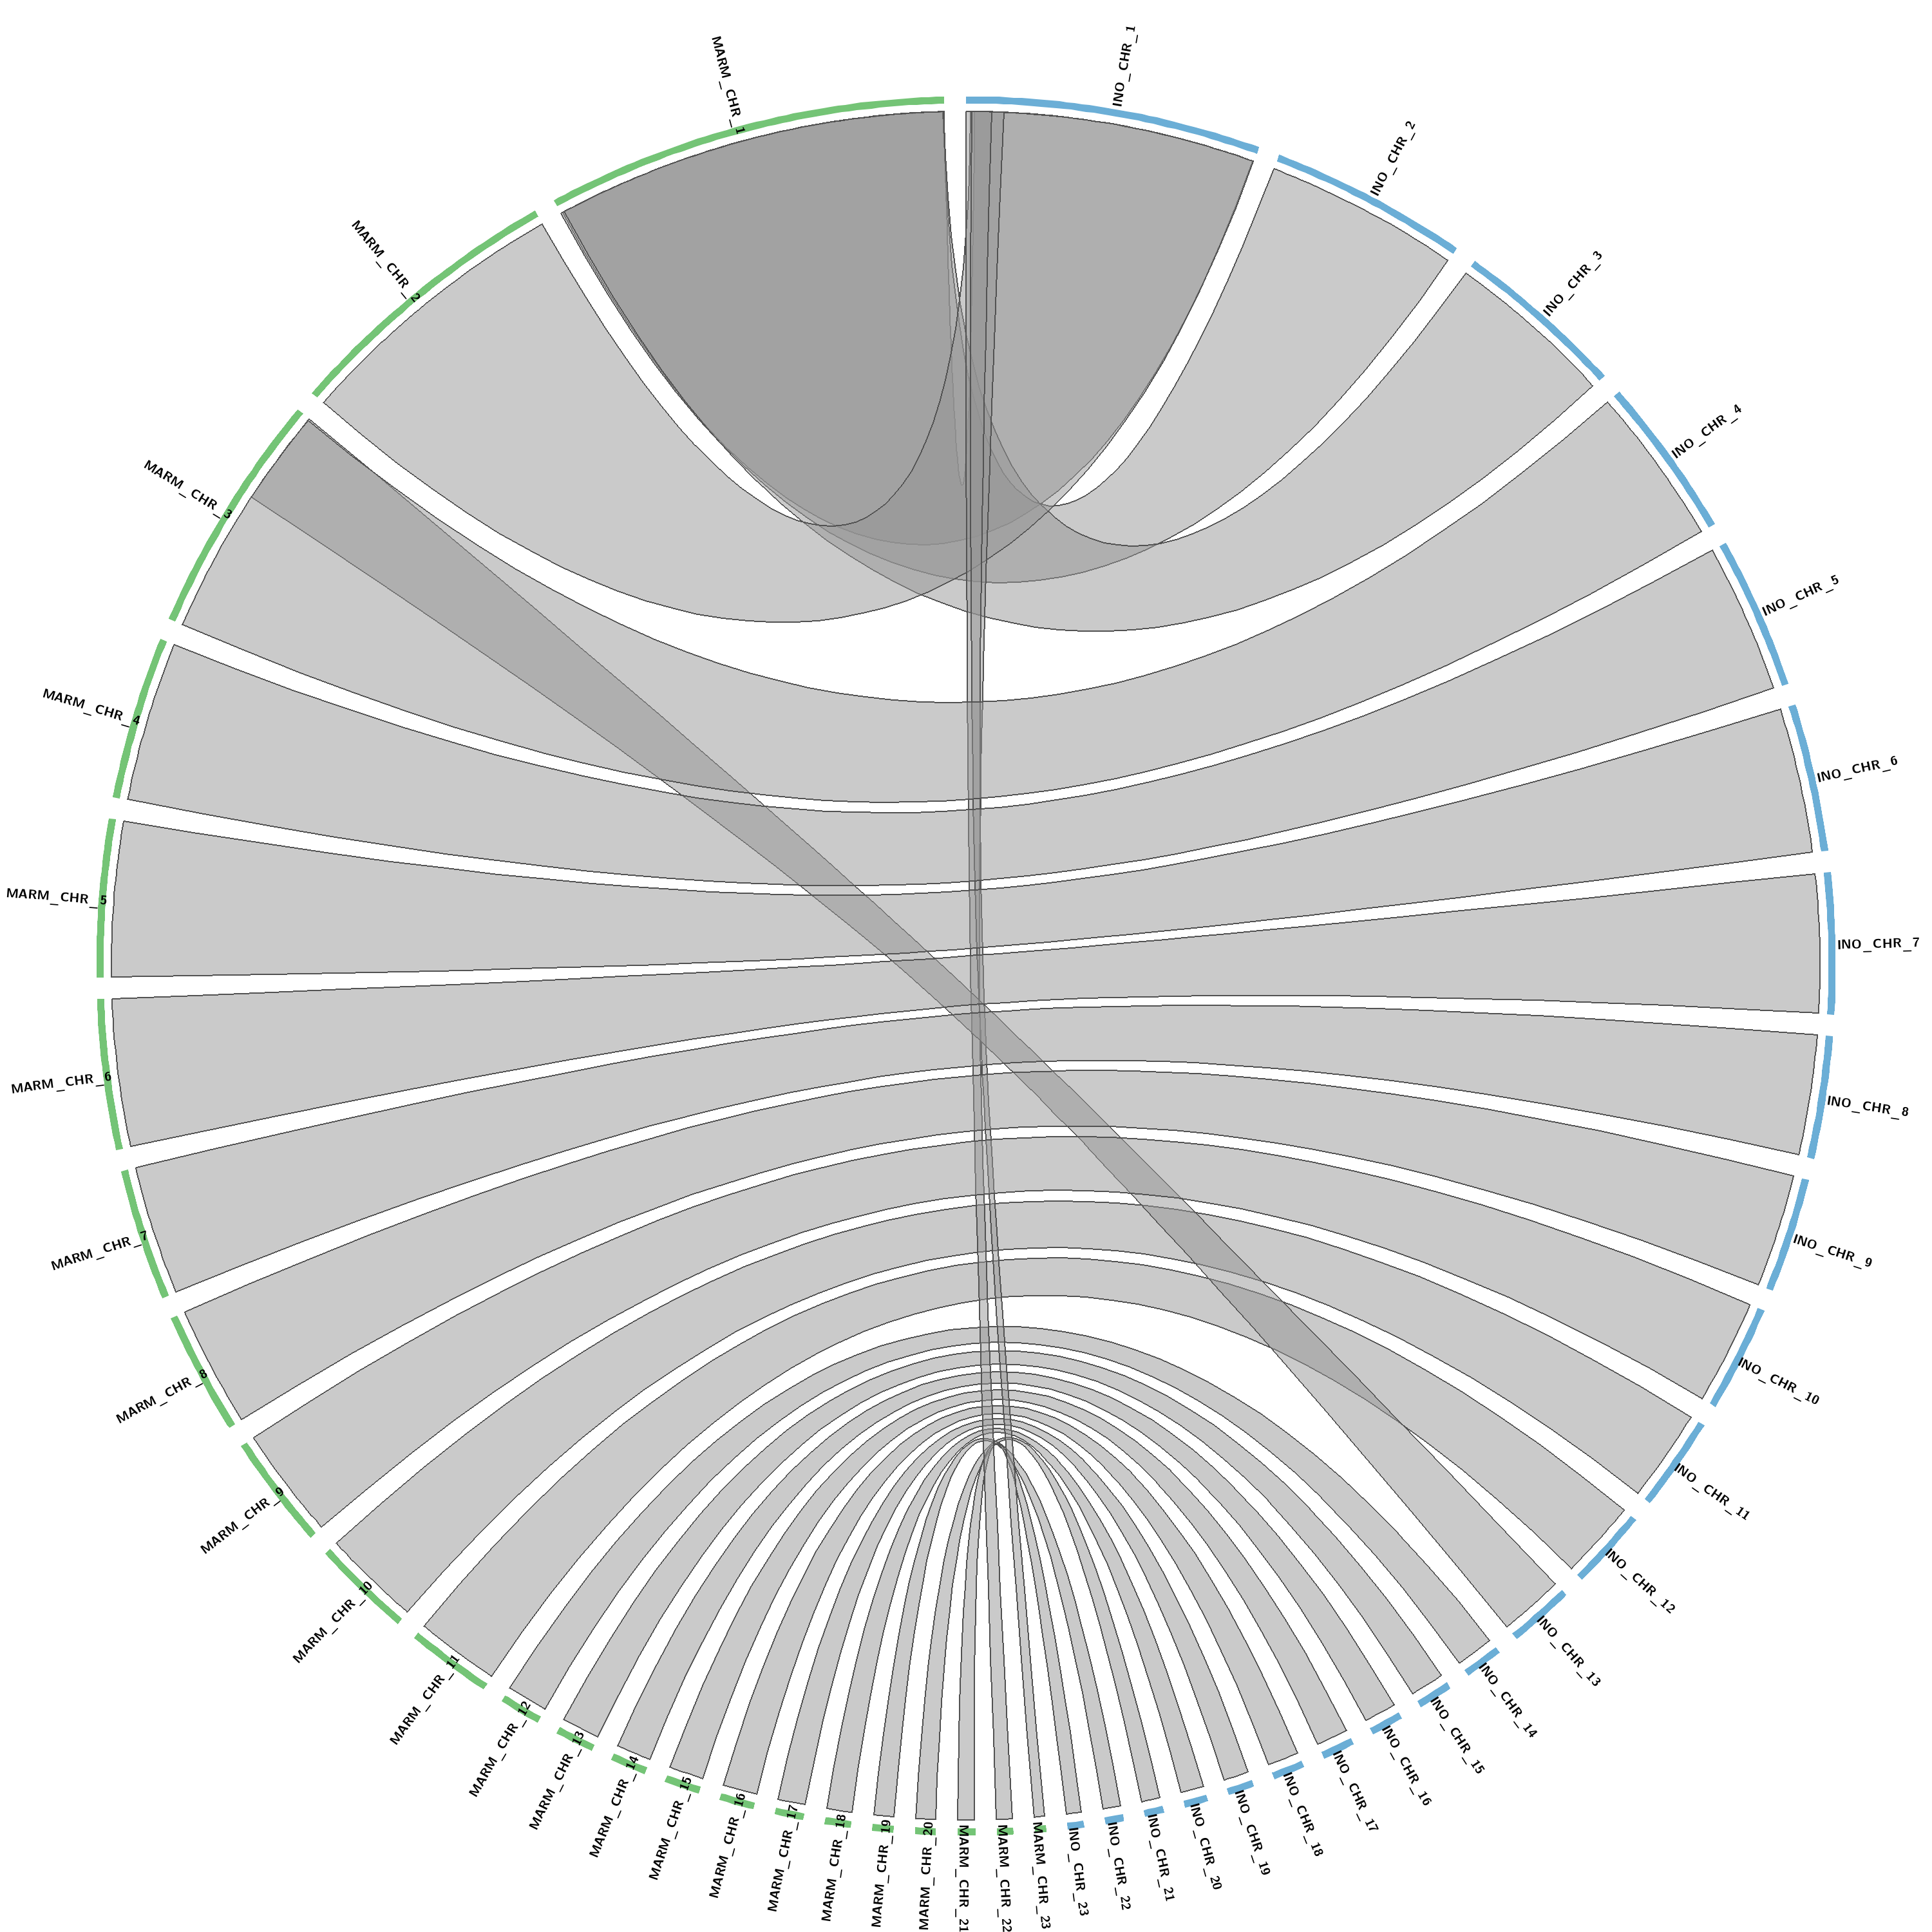

In [6]:
from IPython.display import Image
Image(filename='/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/RAW_ANNOTATION/circos.png') 

## Generation of Hints Files

While AUGUSTUS-CGP can search for homologous regions in the alignment and attempt to annotate the genomes using the AUGUSTUS reference species, the annotation will be much more accurate if RNA-Seq data can be incorporated as well.  


<b>RNA-Sequencing Used to Generate Hints</b>  

|ORDER #|Species|Lizard ID|Tissue|Library Type|Flowcell ID|
|-|-|-|-|-|-|
|MOLNG-1741|Marmoratus|Atig10734|Testes, Brain, and Thigh|Ribo-Depleted Stranded Paired End Rapid-seq 100bp|HVM7NBCXXv2|
MOLNG-1714|Marmoratus|Atig16996|Heart, Lung, Liver, Follicles|Ribodeplted Stranded Paired End rapid-seq 100bp|HVMJGBCXX|
|MOLNG-1713|Marmoratus|Atig1699|Heart, Lung, Liver, Follicles|Poly-A Stranded Paired End Rapid-seq 100bp|HVJM7BCXX|
|MOLNG-1684|Inornatus|InoR265|Germinal Beds|Poly-A Stranded Paired End Rapid-seq 100bp|HVJM7BCXX|
|MOLNG-1655|Inornatus|Ino18789|Brain, Heart, Testes|Poly-A Stranded Paired End Rapid-seq 100bp|HMHHLBCXXa|
|MOLNG-1656|Inornatus|Ino18789|Brain, Heart, Testes|Ribo-Depleted Stranded Paired End Rapid-seq 100bp|HMHHLBCXXb|
|MOLNG-334|Inornatus|InoK103-3 and InoB103|Unknown Mixture of Tissues|Poly-A Stranded Paired End Rapid-seq 100bp|C1EWAACXX|
|MOLNG-335|Inornatus|Ino8103-3 and InoB103|Unknown Mixture of Tissues|Poly-A Stranded Paired End Hi-seq 100bp|C1EWAACXX|



Reads were first trimmed and quality filtered by trimmomatic v0.36 and the quality of pretrimmed and post trimmed reads was compared to ensure all primer sequences were properly removed from the sequences.  Trimmed reads were then aligned to the genome using STAR v2.7.8a.  The resulting sam files were sorted, indexed, and compressed via samtools v1.12 and lastly converted to hint files using AUGUSTUS' bam2hints script v3.4.0.  The below scripts represent this process for the inornatus samples. The exact same process was compelted for the marmoratus samples.

### Trimmomatic

In [2]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/trimmomatic.srun

#!/bin/bash
#SBATCH --job-name trimmomatic                         ## job name
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel                                               ## Partition name
#SBATCH -N 1
#SBATCH -c 30                                                 ## number of processors
#SBATCH --mem=100G                                    ## memory required M for megs, G for gigs
#SBATCH --time 5-00:00:00                              ## time (HH:MM:SS)
#SBATCH --output trimmomatic.out                ## STDOUT
#SBATCH --error trimmomatic.err                     ## STDERR

module purge
module load bio/Trimmomatic/0.36-Java-1.8.0_162

dir="/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/RAW_FASTQ/"
out_dir="/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/TRIMMED_FASTQ/"

r1=('MOLNG-1655_CAGATC_r1_1.fastq.gz'  'MOLNG-1655_GTGAAA_r1_2.fastq.gz'  'MOLNG-1656_GCCAAT_r1_1.fastq.gz'  'MOLNG-334_GCCAAT_r1_3.fastq.gz' 'MOLNG

### FASTQC

In [3]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/multiqc.srun

#!/bin/bash
#SBATCH --job-name ino_multi-qc                         ## job name
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel                                               ## Partition name
#SBATCH -N 1
#SBATCH -c 30                                                 ## number of processors
#SBATCH --mem=100G                                    ## memory required M for megs, G for gigs
#SBATCH --time 5-00:00:00                              ## time (HH:MM:SS)
#SBATCH --output multiqc.out                ## STDOUT
#SBATCH --error multiqc.err                     ## STDERR

module purge
module load bio/FastQC/0.11.5-Java-1.8.0_162
module load bio/MultiQC/1.7-foss-2018a-Python-3.6.4

dir="/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/TRIMMED_FASTQ/"

/usr/bin/time -v fastqc -o $dir -t 30  $dir/*.trimmed.paired

/usr/bin/time -v multiqc $dir/*fastqc.zip


### STAR Alignment

In [4]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/align.srun

#!/bin/bash
#SBATCH --job-name align_ino                         ## job name
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel                                               ## Partition name
#SBATCH -N 1
#SBATCH -c 30                                                 ## number of processors
#SBATCH --mem=100G                                    ## memory required M for megs, G for gigs
#SBATCH --time 5-00:00:00                              ## time (HH:MM:SS)
#SBATCH --output align.out                ## STDOUT
#SBATCH --error align.err                     ## STDERR

module purge
module load bio/STAR/2.7.8a-GCC-10.2.0


dir="/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/TRIMMED_FASTQ/"
out_dir="/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/ALIGNMENTS/"

r1=('MOLNG-1655_CAGATC_r1_1.fastq.gz'  'MOLNG-1655_GTGAAA_r1_2.fastq.gz'  'MOLNG-1656_GCCAAT_r1_1.fastq.gz'  'MOLNG-334_GCCAAT_r1_3.fastq.gz' 'MOLNG-1655_CAGATC_r1_2.fas

### Samtools Manipulation

In [5]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/samtools.srun

#!/bin/bash
#SBATCH --job-name samtools_ino                         ## job name
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel                                               ## Partition name
#SBATCH -N 1
#SBATCH -c 30                                                 ## number of processors
#SBATCH --mem=100G                                    ## memory required M for megs, G for gigs
#SBATCH --time 5-00:00:00                              ## time (HH:MM:SS)
#SBATCH --output samtools.out                ## STDOUT
#SBATCH --error samtools.err                     ## STDERR

module purge
module load bio/SAMtools/1.12-GCC-10.2.0
r1=('MOLNG-1655_CAGATC_r1_1.fastq.gz'  'MOLNG-1655_GTGAAA_r1_2.fastq.gz'  'MOLNG-1656_GCCAAT_r1_1.fastq.gz'  'MOLNG-334_GCCAAT_r1_3.fastq.gz' 'MOLNG-1655_CAGATC_r1_2.fastq.gz'  'MOLNG-1656_ACAGTG_r1_1.fastq.gz'  'MOLNG-1656_GCCAAT_r1_2.fastq.gz'  'MOLNG-335_CAGATC_r1_6.fastq.gz' 'MOLNG-1655_CGATGT_r1_1.fastq.gz'  'MOLNG-1656_ACAGTG_r1_2.fastq.gz'  'MOL

### Creating Hint Files

In [6]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/RNASEQ/INO_BRAKER/bam2hints.srun

#!/bin/bash
#SBATCH --job-name hints_ino                         ## job name
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel                                               ## Partition name
#SBATCH -N 1
#SBATCH -c 1                                                 ## number of processors
#SBATCH --mem=100G                                    ## memory required M for megs, G for gigs
#SBATCH --time 5-00:00:00                              ## time (HH:MM:SS)
#SBATCH --output bam2hints.out                ## STDOUT
#SBATCH --error bam2hints.err                     ## STDERR

module purge
module load bio/AUGUSTUS/3.4.0-foss-2020b

r1=('MOLNG-1655_CAGATC_r1_1.fastq.gz'  'MOLNG-1655_GTGAAA_r1_2.fastq.gz'  'MOLNG-1656_GCCAAT_r1_1.fastq.gz'  'MOLNG-334_GCCAAT_r1_3.fastq.gz' 'MOLNG-1655_CAGATC_r1_2.fastq.gz'  'MOLNG-1656_ACAGTG_r1_1.fastq.gz'  'MOLNG-1656_GCCAAT_r1_2.fastq.gz'  'MOLNG-335_CAGATC_r1_6.fastq.gz' 'MOLNG-1655_CGATGT_r1_1.fastq.gz'  'MOLNG-1656_ACAGTG_r1_2.fastq.gz'  'MOL

## Running Augustus

AUGUSTUS-CGP was then run utilizing the hints and alignment generated previously as well as a uniform star based phylogenetic tree since only two species were being annotated.  The --UTR function was set to off since this is a still an exploratory feature and not fully implemented and could decrease the overall accuracy of the annotation.

In [8]:
%%bash
## phylogenetic tree
cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/RAW_ANNOTATION/tree.newick

(Ino:1,Marm:1);


In [9]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/RAW_ANNOTATION/augustus.srun

#!/bin/bash
#SBATCH --job-name augustus-cgp                         ## job name
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p smp                                               ## Partition name
#SBATCH -N 1
#SBATCH -c 1                                                 ## number of processors
#SBATCH --mem=200G                                    ## memory required M for megs, G for gigs
#SBATCH --time 5-00:00:00                              ## time (HH:MM:SS)
#SBATCH --output cgp.out                ## STDOUT
#SBATCH --error cgp.err                     ## STDERR


module load bio/AUGUSTUS/3.4.0-foss-2020b
export AUGUSTUS_CONFIG_PATH=/home/ndeimler/Augustus/config/
/usr/bin/time -v augustus --species=chicken --treefile=../tree.newick --alnfile=../aln_final.maf --hintsfile=Hints.hints --speciesfilenames=genomes.txt --UTR=off --extrinsicCfgFile=/home/ndeimler/Augustus/config/extrinsic/extrinsic-rna.cfg


## Collapsing/Merging

When analyzing the results of the annotation, the first thing noticed was the extremely high gene count predicting over double the number of genes one would expect to see.  After visual and technical inspection via BLAST the major issue appeared to be fragmentation. AUGUSTUS-CGP was predicting multiple shorter genes where one larger gene should be found.  Therefore, a pipeline for the combination of the these shorter genes into larger genes was produced.  

The GFF file created by AUGUSTUS-CGP was condensed to only contain information lines and no comment lines.  The resulting GFF file was put through GFFCompare version 0.12.6 and then collapsed by Locus ID using a custom script. Collapsing by locus eliminates any alternative splicing that may have been predicted, although there was little to no evidence supporting AUGUSTUS-CGP ability to predict alternatively spliced transcripts.  From these new collapsed genes, protein sequences were created by using gffread version 0.12.7 to create transcripts and emboss' transeq version 6.6.0.0 to translate the sequences into Proteins.  These proteins were then blasted against all human proteins in the Uniprot reviewed proteins database. If two genes in close proximity blasted to the same human protein, they were merged using a custom script.  GFFcompare was run again followed by the collapsing by locus once more.  Transcript and Protein sequences were extracted as above.

### Condense Annotation GFF

In [ ]:
wd = "/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/"

In [ ]:
def condense_gff(gff_file):
    """Very basic function that takes gff file with comment lines
    (such as the one returned by augustus cgp and returns a condensed 
    version without the comment lines"""
    with open(gff_file, "r") as gff, open(gff_file+".condensed", "w") as out:
        for line in gff:
            if line.startswith("#"):
                pass
            else:
                out.write(line)

condense_gff("{}/RAW_ANNOTATION/Ino.cgp.gff".format(wd))
condense_gff("{}/RAW_ANNOTATION/Marm.cgp.gff".format(wd))

### Collapse By Locus

GffCompare was run here on both gff files producing the inter1.combined.gtf files referenced below.
<br>

*Note: GFFCompare was run multiple times throughout this process. The command used was simply gffcompare -o \<outfile_prefix> \<gff_file>*

In [10]:
def condense_by_loci(gff_file):
    new_gff = gff_file.rsplit(".", maxsplit=1)[0] + ".new.gff"
    locus_dict = {}
    with open(gff_file, "r") as gff:
        for line in gff:
            loci_id = line.split('"')[3]
            if loci_id in locus_dict:
                locus_dict[loci_id].append(line)
            else:
                locus_dict[loci_id] = [line]
                
    tmp_dict = {}
    for item,value in locus_dict.items():
        tmp_dict[item] = {'exons':[], 'strand':[], 'chrom':""}
        for entry in value:
            entry = entry.split()
            if entry[2] == 'transcript':

                tmp_dict[item]['strand'].append(entry[6])
                tmp_dict[item]['chrom'] = entry[0]
            if entry[2] == 'exon':
                tmp_dict[item]['exons'].append((entry[3], entry[4]))
    
    gff_dict = {}
    for item in tmp_dict:
        start = 0
        end = 0
        tmp_dict[item]['strand'] = list(set(tmp_dict[item]['strand']))
        tmp_dict[item]['exons'] = set(tmp_dict[item]['exons'])
        gff_dict[item] = []
        for i,exon in enumerate(tmp_dict[item]['exons']):
            if i == 0:
                start = int(exon[0])
                end = int(exon[1])
            else:
                if int(exon[0]) < start:
                    start = int(exon[0])
                if int(exon[1]) > end:
                    end = int(exon[1])
                    
            gff_dict[item].append('{}\tMERGED\texon\t{}\t{}\t.\t{}\t.\ttranscript_id "{}"'.format(tmp_dict[item]['chrom'], exon[0], exon[1], tmp_dict[item]['strand'][0], item))
        gff_dict[item].append('{}\tMERGED\ttranscript\t{}\t{}\t.\t{}\t.\ttranscript_id "{}"'.format(tmp_dict[item]['chrom'], start, end, tmp_dict[item]['strand'][0], item))
    with open(new_gff, "w") as new_gff:
        for item in gff_dict:
            for line in gff_dict[item]:
                new_gff.write(line + "\n")

condense_by_loci("{}/MERGED_READS_v2/MERGED_READS/temp/ino_inter1.combined.gtf".format(wd))
condense_by_loci("{}/MERGED_READS_v2/MERGED_READS/temp/marm_inter1.combined.gtf".format(wd))

### Merge by BLAST

BLAST, as mentioned above was conducted using the proteins produced by the annotation via the condense_by_loci function using gffread and transeq and blasting them against the UniProt reviewed Human Protein Database.

In [ ]:
def print_sbatch(cpu, mem, job, err, out, file, nodes=1):
    """This simple function will create a new sbatch script with the cpu, mem, job name, and stdout and stderr files as you specify in the function call.  This function is simply convenient and serves no real purpose"""
    with open(file, "w") as sh:
        sh.write("#!/bin/bash" + "\n")
        sh.write("#SBATCH --job-name " + str(job) + "\n")
        sh.write("#SBATCH -A m2_jgu-tipton \n#SBATCH -C anyarch \n#SBATCH -p parallel \n")
        sh.write("#SBATCH -N " + str(nodes) + "\n")
        sh.write("#SBATCH -c " + str(cpu) + "\n")
        sh.write("#SBATCH --mem=" + str(mem) + "G\n")
        sh.write("#SBATCH --time 5-00:00:00\n")
        sh.write("#SBATCH --output " + str(out) + "\n")
        sh.write("#SBATCH --error " + str(err) + "\n\n\n")
        sh.write("module purge\n")

def create_blast_script(query, db, out_dir, job_name, db_made=True):
    """Creates standard slurm script for running a blast job"""
    print_sbatch(10, 100, job_name, "{}.err".format(job_name), "{}.out".format(job_name), "{}/{}.srun".format(out_dir, job_name))
    with open("{}/{}.srun".format(out_dir, job_name), "a") as blast:
        blast.write("module load bio/BLAST+/2.11.0-gompi-2020b\n\n")
        if db_made == False:
            blast.write("/usr/bin/time -v makeblastdb -in {} -dbtype prot -out {}\n\n".format(db, "{}/{}".format(out_dir, job_name)))
            blast.write("/usr/bin/time -v blastp -query {} -db {}/{} -out {}/{}.outfmt6 -evalue 1e-6 -num_threads 10 -outfmt 6".format(query, out_dir, job_name, out_dir, job_name))
        else:
            blast.write("/usr/bin/time -v blastp -query {} -db {} -out {}/{}.outfmt6 -evalue 1e-6 -num_threads 10 -outfmt 6".format(query, db, out_dir, job_name))

create_blast_script("{}/MERGED_READS_v2/MERGED_READS/temp/ino_inter1_prot.fa".format(wd), "/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/PROTEINS/human.prot", "{}/MERGED_READS_2.0/temp".format(wd), 'ino_merged_blast', db_made=True)
create_blast_script("{}/MERGED_READS_v2/MERGED_READS/temp/marm_inter1_prot.fa".format(wd), "/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/PROTEINS/human.prot", "{}/MERGED_READS_2.0/temp".format(wd), 'marm_merged_blast', db_made=True)

In [7]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/MERGED_READS/temp/ino_merged_blast.srun

#!/bin/bash
#SBATCH --job-name ino_merged_blast
#SBATCH -A m2_jgu-tipton 
#SBATCH -C anyarch 
#SBATCH -p parallel 
#SBATCH -N 1
#SBATCH -c 10
#SBATCH --mem=100G
#SBATCH --time 5-00:00:00
#SBATCH --output ino_merged_blast.out
#SBATCH --error ino_merged_blast.err


module purge
module load bio/BLAST+/2.11.0-gompi-2020b

/usr/bin/time -v blastp -query /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL//MERGED_READS_2.0/temp/ino_inter1_prot.fa -db /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/PROTEINS/human.prot -out /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL//MERGED_READS_2.0/temp/ino_merged_blast.outfmt6 -evalue 1e-6 -num_threads 10 -outfmt 6

Once the blast scripts had finished, the best hit per gene was selected based on evalue.  The function determine duplicates then checks for annotated proteins that blasted to the same human protein and verifies that they lie on the same chromosome, same strand, and are within 80kb of each other.

In [ ]:
def create_best_hit_dict(blastout):
    tmp = {}
    with open(blastout, "r") as blastout:
        for line in blastout:
            line = line.strip().split()
            if line[0] in tmp:
                if float(line[10]) < float(tmp[line[0]][10]):
                    tmp[line[0]] = line
                    
            else:
                tmp[line[0]] = line
    return tmp

def load_gff_dictionary(gff_file):
    gff_dict = {}
    with open(gff_file, "r") as gff:
        for line in gff:
            line = line.strip('\n')
            gene_id = line.split('"')[1]
            if gene_id in gff_dict:
                gff_dict[gene_id].append(line)
            else:
                gff_dict[gene_id] = [line]
    return gff_dict

def determine_duplicates(best_hits, gff_file):
    gff_dict = load_gff_dictionary(gff_file)
    possible_merge = {}
    human_dict = {}

    for item,value in best_hits.items():
        if value[1] in human_dict:
            human_dict[value[1]].append(value[0])
        else:
            human_dict[value[1]] = [value[0]]
    
    for item,value in human_dict.items():
        if len(value) > 1:
            possible_merge[item] = value
    
    retained = {}
    for item in possible_merge:
        retained[item] = []
        
    for item,value in possible_merge.items():
        if True:
            if value[0].strip("_1") in gff_dict:
                for entry in gff_dict[value[0].strip("_1")]:
                    entry = entry.split()
                    if entry[2] == "transcript":
                        chrom = entry[0]
                        start = int(entry[3])
                        end = int(entry[4])
                        strand = entry[6]
                for gene in value[1:]:
                    gene = gene.split("_1")[0]
                    for entry in gff_dict[gene]:
                        entry = entry.split()
                        if entry[2] == "transcript":
                            if chrom == entry[0] and strand == entry[6]:
                                if (int(entry[3]) > start - 80000 and int(entry[3]) < start+80000) or (int(entry[3]) > end - 80000 and int(entry[3]) < end + 80000):            
                                    end = int(entry[4])
                                    retained[item].append(gene)
                                    if len(retained[item]) == 1:
                                        retained[item].append(value[0].strip("_1"))
    possible_merge = {}
    for item,value in retained.items():
        if len(value) > 0:
            possible_merge[item] = value
    
    return possible_merge


ino_best_hits = create_best_hit_dict("{}/MERGED_READS_v2/MERGED_READS=/temp/ino_merged_blast.outfmt6".format(wd))
marm_best_hits = create_best_hit_dict("{}/MERGED_READS_v2/MERGED_READS/temp/marm_merged_blast.outfmt6".format(wd))
ino_possible = determine_duplicates(ino_best_hits, "{}/MERGED_READS_v2/MERGED_READS/temp/ino_inter1.combined.new.gff".format(wd))
marm_possible = determine_duplicates(marm_best_hits, "{}/MERGED_READS_v2/MERGED_READS/temp/marm_inter1.combined.new.gff".format(wd))

The possible merges are now listed into two dictionaries. The function create_new_gff uses this information to merge all genes together that may have been identified.

In [ ]:
def load_gff_dicts(gff_file, gene_list):
    unmodified={}
    modified={}
    with open(gff_file, "r") as gff:
        for line in gff:
            line = line.strip()
            gene_id = line.split('"')[1]
            if gene_id in gene_list:
                line = line.split()
                if gene_id in modified:
                    modified[gene_id].append(line)
                else:
                    modified[gene_id] = [line]
            else:
                if gene_id in unmodified:
                    unmodified[gene_id].append(line)
                else:
                    unmodified[gene_id] = [line]
    return unmodified, modified

def create_new_gff(old_gff, merges):
    gene_list = []
    for key,values in merges.items():
        for gene in values:
            gene_list.append(gene)

    unmodified, modified = load_gff_dicts(old_gff, gene_list)

    merge_dict = {}
    
    for item,value in merges.items():
        merge_dict[item] = {'exons':[], 'strand':[], 'chrom':""}
        for gene in value:
            for entry in modified[gene]:
                if entry[2] == 'transcript':
                    merge_dict[item]['strand'].append(entry[6])
                    merge_dict[item]['chrom'] = entry[0]
                if entry[2] == 'exon':
                    merge_dict[item]['exons'].append((entry[3], entry[4]))
    
    gff_dict = {}
    for item in merge_dict:
        start = 0
        end = 0
        merge_dict[item]['strand'] = list(set(merge_dict[item]['strand']))
        merge_dict[item]['exons'] = set(merge_dict[item]['exons'])
        gff_dict[item] = []
        for i,exon in enumerate(merge_dict[item]['exons']):
            if i == 0:
                start = int(exon[0])
                end = int(exon[1])
            else:
                if int(exon[0]) < start:
                    start = int(exon[0])
                if int(exon[1]) > end:
                    end = int(exon[1])
            
            gff_dict[item].append('{}\tMERGED\texon\t{}\t{}\t.\t{}\t.\ttranscript_id "{}"'.format(merge_dict[item]['chrom'], exon[0], exon[1], merge_dict[item]['strand'][0], item))          
        gff_dict[item].append('{}\tMERGED\ttranscript\t{}\t{}\t.\t{}\t.\ttranscript_id "{}"'.format(merge_dict[item]['chrom'], start, end, merge_dict[item]['strand'][0], item))
    new_gff = old_gff.rsplit(".", maxsplit=1)[0] + ".merged.gff"
    with open(new_gff, "w") as new:
        for item in unmodified:
            for line in unmodified[item]:
                new.write(line + "\n")
        for item in gff_dict:
            for line in gff_dict[item]:
                new.write(line + "\n")


create_new_gff("{}/MERGED_READS_v2/MERGED_READS/temp/ino_inter1.combined.new.gff".format(wd), ino_possible)
create_new_gff("{}/MERGED_READS_v2/MERGED_READS/temp/marm_inter1.combined.new.gff".format(wd), marm_possible)

### Collapse by Locus #2
An additional gffcompare and collapsing by locus as seen above is required here.  Say a gene is fragmented into three segments.  The first and last segment blasted to the same human protein, but the middle fragment did not.  They are now annotated as overlapping genes; which while possible are the minority occasion. Therefore, all genes sharing the same locus are collapsed.

In [12]:
condense_by_loci("/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/MERGED_READS/temp/ino_inter2.combined.gtf")
condense_by_loci("/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/MERGED_READS/temp/marm_inter2.combined.gtf")   

## Filtering Out Single Exon Genes

While single exon genes can be informative and do exist, AUGUSTUS-CGP predicted a very high quantity of single exon genes.  This could be caused by the lack of repeat masking prior to annotation or simply erroneous predictions.  In order to eliminate as many errors/fragments as possible, every single exon gene was blasted against SinEx DB 2.0 mouse single exon genes.  Those that were able to be identified were retained, while single exon genes that could not be assigned a function were discarded.

### Determine Single Exon Genes in Annotation

Single Exon genes were identified in the annotation using the gff file produced by condensing by locus previously.  This resulted in 8,333 and 8,289 single exon genes in the Inornatus and Marmoratus annotations respectively.

In [ ]:
def filter(gtf, prot, fasta_out):
    proteins = {}
    exons = {}
    
    with open(prot, "r") as prot:
        header = ""
        seq = ""
        for line in prot:
            if line.startswith(">"):
                if header != "":
                    proteins[header] = seq
                header = line.strip().split(" ")[0].split(">")[-1]
                seq = ""
            else:
                seq += line.strip()
        proteins[header] = seq
        
    with open(gtf, "r") as gtf:
        for line in gtf:
            line = line.strip().split()
            if line[2] == "exon":
                trans_id = line[9].split('"')[1]
                if trans_id in exons:
                    exons[trans_id] += 1
                else:
                    exons[trans_id] = 1
                    
    single_count = 0
    for item in exons:
        if exons[item] == 1:
            single_count += 1
    print("Number of Single Exon Genes Predicted: {}".format(single_count))
    
    
    with open(fasta_out, "w") as fa_out:
        for item in exons:
            if exons[item] == 1:
                fa_out.write(">{}\n{}\n".format(item, proteins[item]))

    return exons

ino_single_exon = filter("{}/MERGED_READS/ino.no_prefix.gff".format(wd), "{}/MERGED_READS/ino_prot.fa".format(wd), "{}/REMOVE_SINGLE_EXON/temp/ino_prot.fa".format(wd))        
marm_single_exon = filter("{}/MERGED_READS/marm.no_prefix.gff".format(wd), "{}/MERGED_READS/marm_prot.fa".format(wd), "{}/REMOVE_SINGLE_EXON/temp/marm_prot.fa".format(wd))

### Blast Single Exon Annotations Against Reference

In [ ]:
create_blast_script("/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/mouse_single_exon.fa", "{}/REMOVE_SINGLE_EXON/temp/ino_prot.fa".format(wd), "{}/REMOVE_SINGLE_EXON/temp/".format(wd), "ino_single_exon_blast", db_made=False)
create_blast_script("/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/mouse_single_exon.fa", "{}/REMOVE_SINGLE_EXON/temp/marm_prot.fa".format(wd), "{}/REMOVE_SINGLE_EXON/temp/".format(wd), "marm_single_exon_blast", db_made=False)
# modify scripts to include other parameters in output  -outfmt "6 qseqid sseqid qlen slen qstart qend sstart send evalue bitscore length pident nident"

In [13]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/REMOVE_SINGLE_EXON/temp/ino_single_exon_blast.srun

#!/bin/bash
#SBATCH --job-name ino_single_exon_blast
#SBATCH -A m2_jgu-tipton 
#SBATCH -C anyarch 
#SBATCH -p parallel 
#SBATCH -N 1
#SBATCH -c 10
#SBATCH --mem=100G
#SBATCH --time 5-00:00:00
#SBATCH --output ino_single_exon_blast.out
#SBATCH --error ino_single_exon_blast.err


module purge
module load bio/BLAST+/2.11.0-gompi-2020b

/usr/bin/time -v makeblastdb -in /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/temp/ino_prot.fa -dbtype prot -out /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/temp//ino_single_exon_blast

/usr/bin/time -v blastp -query /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/mouse_single_exon.fa -db /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/temp//ino_single_exon_blast -out /lustre/mi

### Determine Hits and Filter GFF file

Single exon genes were determined to be identified if the alignment length was greater than 60% of the reference gene and the percent identitiy of the alignment was greater than 70%.  From this new GFF file, final transcript and protein sequences were created.

In [ ]:
def single_exon_hits(blast):
    hits = []
    with open(blast, "r") as blast:
        for line in blast:
            line = line.strip().split()
            if float(line[10]) / float(line[2]) > 0.6 and float(line[11]) > 0.7:
                hits.append(line[1])
            
    hits = set(hits)
    return hits

def filter_gtf(gtf, out_prefix, single_genes, exon_counts):
    gene_id = [item.split(".")[0] for item in single_genes]
    
    for item in exon_counts:
        if exon_counts[item] > 1:
            gene_id.append(item.split(".")[0])
            
    with open(gtf, "r") as gtf, open("{}.retained.gtf".format(out_prefix), "w") as retain, open("{}.single_exon_removed.gtf".format(out_prefix), "w") as remove:
        for line in gtf:
            tmp = line.strip().split()
            if tmp[2] == 'gene':
                if tmp[8] in gene_id:
                    retain.write(line)
                else:
                    remove.write(line)
            elif tmp[2] == 'transcript':
                trans_id = tmp[9].split('"')[1]
                if exon_counts[trans_id] > 1:
                    retain.write(line)
                else:
                    if trans_id in single_genes:
                        retain.write(line)
                    else:
                        remove.write(line)
            else:
                trans_id = tmp[9].split('"')[1]
                if exon_counts[trans_id] > 1:
                    retain.write(line)
                else:
                    if trans_id in single_genes:
                        retain.write(line)
                    else:
                        remove.write(line)
                        
ino_single_genes = single_exon_hits("{}/REMOVE_SINGLE_EXON/temp/ino_single_exon_blast.outfmt6".format(wd))
filter_gtf("{}/MERGED_READS/ino.no_prefix.gff".format(wd), "{}/REMOVE_SINGLE_EXON/temp/ino.filtered.gtf".format(wd), ino_single_genes, ino_single_exon)
marm_single_genes = single_exon_hits("{}/REMOVE_SINGLE_EXON/temp/marm_single_exon_blast.outfmt6".format(wd))
filter_gtf("{}/MERGED_READS/marm.no_prefix.gff".format(wd), "{}/REMOVE_SINGLE_EXON/temp/marm.filtered.gtf".format(wd), marm_single_genes, marm_single_exon)

## Annotation Post Processing Summary

<b>Number of Genes at Each Stage of Processing</b>

||Raw Annotation|Merged|Single Exon Genes Removed|Final Gene Count|
|-|-|-|-|-|
|Inornatus|47,642|36,990|7,639/8,333|29,351|
|Marmoratus|45,146|37,174|7,602/8,289|29,572|


## Annotation Completeness

Annotation completeness as measured using BUSCO and by searching for hox genes previously described in literature.  



### BUSCO Analysis

BUSCO is a program that searches for evolutionary conserved single copy genes, or genes that are unlikely to undergo duplication or deletion events.  On these annotations to rounds of BUSCO were completed using BUSCO v5.0.0 with the Sauropsida_odb10 database and Vertebrata_odb10 database. The below commands are for the inornatus genome annotation, but were duplicated for the marmoratus genome.

<b> BUSCO Results </b><br>

||Sauropsida BUSCO|Vertebrata BUSCO|
|-|-|-|
|Inornatus|C:80.5%[S:79.4%,D:1.1%],F:4.4%,M:15.1%,n:7480|C:83.9%[S:82.7%,D:1.2%],F:6.9%,M:9.2%,n:3354|
|Marmoratus|C:78.9%[S:77.8%,D:1.1%],F:5.2%,M:15.9%,n:7480|C:83.2%[S:82.0%,D:1.2%],F:7.1%,M:9.7%,n:3354|

In [ ]:
def create_busco_script(fasta, lineage, out_dir, job_name):
    print_sbatch(1, 100, job_name, "{}.err".format(job_name), "{}.out".format(job_name), "{}/{}.srun".format(out_dir, job_name))
    with open("{}/{}.srun".format(out_dir, job_name), "a") as busco:
        busco.write("\n\nmodule purge\n")
        busco.write("module load bio/BUSCO/5.0.0-foss-2020b\ndownloads='/lustre/miifs03/scratch/m2_jgu-tipton/SOFTWARE/busco_downloads/'\n")
        busco.write("export AUGUSTUS_CONFIG_PATH=/home/ndeimler/Augustus/config/\n\n")
        busco.write("/usr/bin/time -v busco -i {} -l {} -o {} -m protein --offline --download_path $downloads --augustus -c 1".format(fasta, lineage, job_name))
        
create_busco_script("{}/REMOVE_SINGLE_EXON/ino_prot.fa".format(wd), 'sauropsida_odb10', "{}/COMPLETENESS/".format(wd), 'ino_busco')
create_busco_script("{}/REMOVE_SINGLE_EXON/marm_prot.fa".format(wd), 'sauropsida_odb10', "{}/COMPLETENESS/".format(wd), 'marm_busco')
create_busco_script("{}/REMOVE_SINGLE_EXON/ino_prot.fa".format(wd), 'vertebrata_odb10', "{}/COMPLETENESS/".format(wd), 'ino_vert_busco')
create_busco_script("{}/REMOVE_SINGLE_EXON/marm_prot.fa".format(wd), 'vertebrata_odb10', "{}/COMPLETENESS/".format(wd), 'marm__vert_busco')

In [14]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/COMPLETENESS/ino_busco.srun

#!/bin/bash
#SBATCH --job-name ino_busco
#SBATCH -A m2_jgu-tipton 
#SBATCH -C anyarch 
#SBATCH -p parallel 
#SBATCH -N 1
#SBATCH -c 1
#SBATCH --mem=100G
#SBATCH --time 5-00:00:00
#SBATCH --output ino_busco.out
#SBATCH --error ino_busco.err


module purge


module purge
module load bio/BUSCO/5.0.0-foss-2020b
downloads='/lustre/miifs03/scratch/m2_jgu-tipton/SOFTWARE/busco_downloads/'
export AUGUSTUS_CONFIG_PATH=/home/ndeimler/Augustus/config/

/usr/bin/time -v busco -i /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/ino_prot.fa -l sauropsida_odb10 -o ino_busco -m protein --offline --download_path $downloads --augustus -c 1

In [15]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/COMPLETENESS/ino_vert_busco.srun

#!/bin/bash
#SBATCH --job-name ino_busco
#SBATCH -A m2_jgu-tipton 
#SBATCH -C anyarch 
#SBATCH -p parallel 
#SBATCH -N 1
#SBATCH -c 1
#SBATCH --mem=100G
#SBATCH --time 5-00:00:00
#SBATCH --output ino_vert_busco.out
#SBATCH --error ino_vert_busco.err


module purge


module purge
module load bio/BUSCO/5.0.0-foss-2020b
downloads='/lustre/miifs03/scratch/m2_jgu-tipton/SOFTWARE/busco_downloads/'
export AUGUSTUS_CONFIG_PATH=/home/ndeimler/Augustus/config/

/usr/bin/time -v busco -i /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/ino_prot.fa -l vertebrata_odb10 -o ino_vert_busco -m protein --offline --download_path $downloads --augustus -c 1


In [16]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/COMPLETENESS/ino_busco.out

INFO:	***** Start a BUSCO v5.0.0 analysis, current time: 12/28/2021 10:12:37 *****
INFO:	Configuring BUSCO with local environment
INFO:	Mode is proteins
INFO:	Input file is /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/ino_prot.fa
INFO:	Running BUSCO using lineage dataset sauropsida_odb10 (eukaryota, 2021-02-19)
INFO:	***** Run HMMER on gene sequences *****
INFO:	Running 7480 job(s) on hmmsearch, starting at 12/28/2021 10:12:39
INFO:	[hmmsearch]	748 of 7480 task(s) completed
INFO:	[hmmsearch]	1496 of 7480 task(s) completed
INFO:	[hmmsearch]	2244 of 7480 task(s) completed
INFO:	[hmmsearch]	2992 of 7480 task(s) completed
INFO:	[hmmsearch]	3740 of 7480 task(s) completed
INFO:	[hmmsearch]	4488 of 7480 task(s) completed
INFO:	[hmmsearch]	5236 of 7480 task(s) completed
INFO:	[hmmsearch]	5984 of 7480 task(s) completed
INFO:	[hmmsearch]	6732 of 7480 task(s) completed
INFO:	[hmmsearch]	7480 of 7480 task

In [17]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/COMPLETENESS/marm_busco.out

INFO:	***** Start a BUSCO v5.0.0 analysis, current time: 12/28/2021 10:12:38 *****
INFO:	Configuring BUSCO with local environment
INFO:	Mode is proteins
INFO:	Input file is /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/marm_prot.fa
INFO:	Running BUSCO using lineage dataset sauropsida_odb10 (eukaryota, 2021-02-19)
INFO:	***** Run HMMER on gene sequences *****
INFO:	Running 7480 job(s) on hmmsearch, starting at 12/28/2021 10:12:39
INFO:	[hmmsearch]	748 of 7480 task(s) completed
INFO:	[hmmsearch]	1496 of 7480 task(s) completed
INFO:	[hmmsearch]	2244 of 7480 task(s) completed
INFO:	[hmmsearch]	2992 of 7480 task(s) completed
INFO:	[hmmsearch]	3740 of 7480 task(s) completed
INFO:	[hmmsearch]	4488 of 7480 task(s) completed
INFO:	[hmmsearch]	5236 of 7480 task(s) completed
INFO:	[hmmsearch]	5984 of 7480 task(s) completed
INFO:	[hmmsearch]	6732 of 7480 task(s) completed
INFO:	[hmmsearch]	7480 of 7480 tas

In [18]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/COMPLETENESS/ino_vert_busco.out

INFO:	***** Start a BUSCO v5.0.0 analysis, current time: 12/28/2021 10:29:27 *****
INFO:	Configuring BUSCO with local environment
INFO:	Mode is proteins
INFO:	Input file is /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/ino_prot.fa
INFO:	Running BUSCO using lineage dataset vertebrata_odb10 (eukaryota, 2021-02-19)
INFO:	***** Run HMMER on gene sequences *****
INFO:	Running 3354 job(s) on hmmsearch, starting at 12/28/2021 10:29:28
INFO:	[hmmsearch]	336 of 3354 task(s) completed
INFO:	[hmmsearch]	671 of 3354 task(s) completed
INFO:	[hmmsearch]	1007 of 3354 task(s) completed
INFO:	[hmmsearch]	1342 of 3354 task(s) completed
INFO:	[hmmsearch]	1677 of 3354 task(s) completed
INFO:	[hmmsearch]	2013 of 3354 task(s) completed
INFO:	[hmmsearch]	2348 of 3354 task(s) completed
INFO:	[hmmsearch]	2684 of 3354 task(s) completed
INFO:	[hmmsearch]	3019 of 3354 task(s) completed
INFO:	[hmmsearch]	3354 of 3354 task(

In [19]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/COMPLETENESS/marm_vert_busco.out

INFO:	***** Start a BUSCO v5.0.0 analysis, current time: 12/28/2021 10:29:27 *****
INFO:	Configuring BUSCO with local environment
INFO:	Mode is proteins
INFO:	Input file is /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2//REMOVE_SINGLE_EXON/marm_prot.fa
INFO:	Running BUSCO using lineage dataset vertebrata_odb10 (eukaryota, 2021-02-19)
INFO:	***** Run HMMER on gene sequences *****
INFO:	Running 3354 job(s) on hmmsearch, starting at 12/28/2021 10:29:28
INFO:	[hmmsearch]	336 of 3354 task(s) completed
INFO:	[hmmsearch]	671 of 3354 task(s) completed
INFO:	[hmmsearch]	1007 of 3354 task(s) completed
INFO:	[hmmsearch]	1342 of 3354 task(s) completed
INFO:	[hmmsearch]	1677 of 3354 task(s) completed
INFO:	[hmmsearch]	2013 of 3354 task(s) completed
INFO:	[hmmsearch]	2348 of 3354 task(s) completed
INFO:	[hmmsearch]	2684 of 3354 task(s) completed
INFO:	[hmmsearch]	3019 of 3354 task(s) completed
INFO:	[hmmsearch]	3354 of 3354 task

### Plotting Gene Density

In [100]:
def get_transcript_counts(gtf, karyotype, plot_title, outfile):
    transcripts_dict = {}
    chromosomes = {}
    with open(karyotype, "r") as karyotype:
        for line in karyotype:
            line = line.strip().split()
            chromosomes[line[2]] = float(line[5]) / 1000000
    
    print(chromosomes)
    with open(gtf, "r") as gtf:
        for line in gtf:
            line = line.strip().split()
            if "Chr" not in line[0]:
                continue
            if line[2] == 'gene':
                if line[0] in transcripts_dict:
                    transcripts_dict[line[0]] += 1
                else:
                    transcripts_dict[line[0]] = 1
    print(transcripts_dict)
    index = ["Chr_1", "Chr_2", "Chr_3", "Chr_4", "Chr_5", "Chr_6", "Chr_7", "Chr_8","Chr_9", 
             "Chr_10","Chr_11", "Chr_12","Chr_13", "Chr_14","Chr_15", "Chr_16", "Chr_17",
            "Chr_18", "Chr_19", "Chr_20", "Chr_21", "Chr_22", "Chr_23"]
    
    transcripts = [transcripts_dict[chrom] for chrom in index]

    transcript_density = [transcripts_dict[chrom]/chromosomes[chrom] for chrom in index]
    
    print(transcripts)
    print(transcript_density)
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    figure = plt.figure()
    ax1 = figure.add_subplot()
    figure.set_size_inches(12,10)
    ind = np.arange(23)
    print(ind)
    print(chromosomes.values())
    ax1.bar(ind, chromosomes.values(), color='red')
    plt.xticks(ticks=ind, labels=index, rotation = 90)
    ax1.set_xlabel("Chromosome")
    ax1.set_ylabel('Chromosome Length (Mb)')
    
    ax2 = ax1.twinx()
    ax2.plot(ind, transcript_density, color='blue')
    ax2.set_ylabel('Average Transcript Density per MB')
    plt.title(plot_title)
    plt.show()
    
    data = pd.DataFrame(data=[transcripts, transcript_density],
                        index=["Transcripts", "Trans_Density"], 
                        columns=index)
    
    data.to_csv('{}.txt'.format(outfile), sep="\t")

    figure.savefig('{}.png'.format(outfile), format='png')
    figure.savefig('{}.pdf'.format(outfile), format='pdf')

In [99]:
gtf_transcript_count = {}
gff_transcript_count= {}
gff_gene_count = {}
with open('/lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/INO/Ino.gtf', 'r') as gtf:
    for line in gtf:
        if line.startswith("Chr"):
            line = line.strip().split()
            if line[2] == 'transcript':
                if line[0] in gtf_transcript_count:
                    gtf_transcript_count[line[0]] += 1
                else:
                    gtf_transcript_count[line[0]] = 1

# with open('/lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/INO/Ino.gff', 'r') as gff:
#     for line in gff:
#         if line.startswith("Chr"):
#             line = line.strip().split()
#             if line[2] == 'transcript':
#                 gff_transcript_count += 1
#             if line[2] == 'gene':
#                 gff_gene_count += 1
                
print(gtf_transcript_count)
print(gff_transcript_count)
print(gff_gene_count)


gtf_transcript_count = 0
gff_transcript_count=0
gff_gene_count = 0

with open('/lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/NEO/superNeo.gff', 'r') as gff:
    for line in gff:
        if line.startswith("Ino_Chr_3"):
            line = line.strip().split()
            if line[2] == 'transcript':
                gff_transcript_count += 1
            if line[2] == 'gene':
                gff_gene_count += 1
                
print(gtf_transcript_count)
print(gff_transcript_count)
print(gff_gene_count)

{'Chr_1': 4954, 'Chr_10': 1155, 'Chr_11': 1191, 'Chr_12': 808, 'Chr_13': 1666, 'Chr_14': 605, 'Chr_15': 859, 'Chr_16': 536, 'Chr_17': 493, 'Chr_18': 545, 'Chr_19': 538, 'Chr_2': 2348, 'Chr_20': 542, 'Chr_21': 417, 'Chr_22': 578, 'Chr_23': 394, 'Chr_3': 1772, 'Chr_4': 2056, 'Chr_5': 1684, 'Chr_6': 1751, 'Chr_7': 1630, 'Chr_8': 1458, 'Chr_9': 1300}
{}
{}
0
1772
1772


{'Chr_1': 211.802931, 'Chr_2': 142.394718, 'Chr_3': 122.913588, 'Chr_4': 115.499427, 'Chr_5': 109.271857, 'Chr_6': 106.146816, 'Chr_7': 100.838152, 'Chr_8': 87.792216, 'Chr_9': 82.377927, 'Chr_10': 76.095363, 'Chr_11': 66.987829, 'Chr_12': 56.931253, 'Chr_13': 46.781367, 'Chr_14': 27.37863, 'Chr_15': 24.63629, 'Chr_16': 23.160691, 'Chr_17': 23.016614, 'Chr_18': 22.505394, 'Chr_19': 18.371447, 'Chr_20': 16.567243, 'Chr_21': 13.29929, 'Chr_22': 12.89113, 'Chr_23': 11.142249}
{'Chr_1': 4954, 'Chr_10': 1155, 'Chr_11': 1191, 'Chr_12': 808, 'Chr_13': 1666, 'Chr_14': 605, 'Chr_15': 859, 'Chr_16': 536, 'Chr_17': 493, 'Chr_18': 545, 'Chr_19': 538, 'Chr_2': 2348, 'Chr_20': 542, 'Chr_21': 417, 'Chr_22': 578, 'Chr_23': 394, 'Chr_3': 1772, 'Chr_4': 2056, 'Chr_5': 1684, 'Chr_6': 1751, 'Chr_7': 1630, 'Chr_8': 1458, 'Chr_9': 1300}
[4954, 2348, 1772, 2056, 1684, 1751, 1630, 1458, 1300, 1155, 1191, 808, 1666, 605, 859, 536, 493, 545, 538, 542, 417, 578, 394]
[23.389666878594802, 16.489375680353536, 14.4

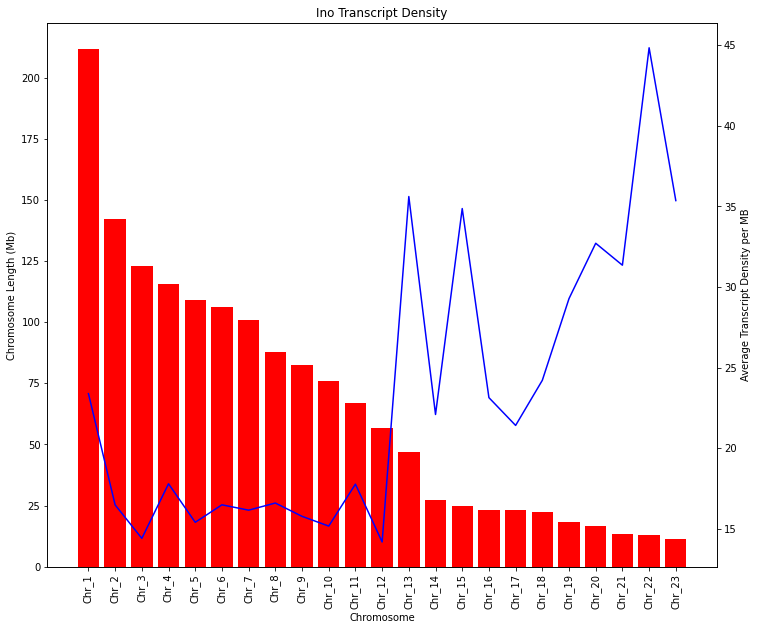

In [101]:
wd = '/lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/INO/'
get_transcript_counts('{}/Ino.gff'.format(wd), "{}/ino.major_chr.karyotype.txt".format(wd), 'Ino Transcript Density', '{}/ino_transcript_density'.format(wd))

{'Chr_1': 288.666491, 'Chr_2': 204.897822, 'Chr_3': 174.748371, 'Chr_4': 116.938036, 'Chr_5': 113.087052, 'Chr_6': 107.802382, 'Chr_7': 94.360285, 'Chr_8': 87.904786, 'Chr_9': 81.193049, 'Chr_10': 71.236032, 'Chr_11': 60.979847, 'Chr_12': 29.315409, 'Chr_13': 27.465003, 'Chr_14': 25.21289, 'Chr_15': 24.968922, 'Chr_16': 24.756154, 'Chr_17': 20.255048, 'Chr_18': 18.473075, 'Chr_19': 14.759174, 'Chr_20': 14.36847, 'Chr_21': 12.404717, 'Chr_22': 11.387149, 'Chr_23': 7.631903}
{'Chr_1': 4081, 'Chr_10': 1205, 'Chr_11': 803, 'Chr_12': 598, 'Chr_13': 846, 'Chr_14': 569, 'Chr_15': 510, 'Chr_16': 535, 'Chr_17': 506, 'Chr_18': 549, 'Chr_19': 582, 'Chr_2': 4327, 'Chr_20': 412, 'Chr_21': 383, 'Chr_22': 375, 'Chr_23': 371, 'Chr_3': 3877, 'Chr_4': 1649, 'Chr_5': 1762, 'Chr_6': 1626, 'Chr_7': 1452, 'Chr_8': 1300, 'Chr_9': 1191}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
dict_values([288.666491, 204.897822, 174.748371, 116.938036, 113.087052, 107.802382, 94.360285, 87.90478

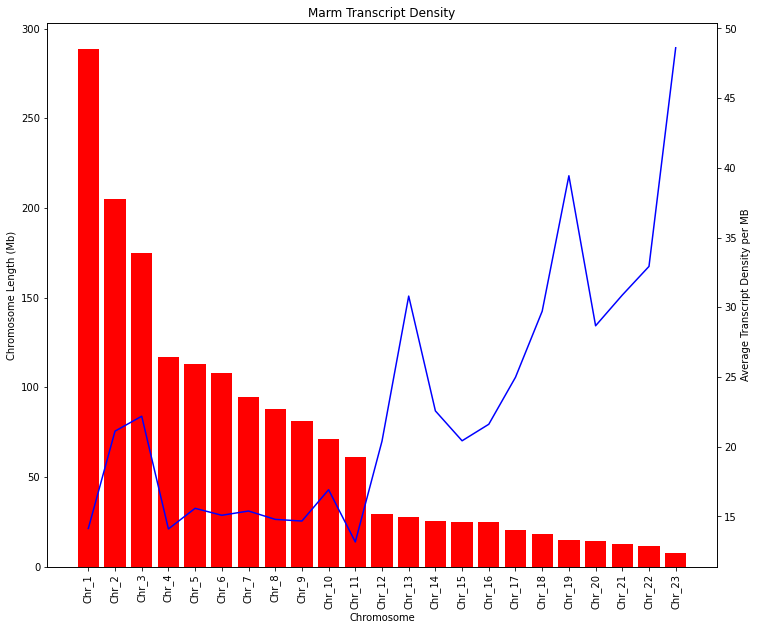

In [78]:
wd = '/lustre/miifs03/scratch/m2_jgu-tipton/LIZARD_GENOMES/MARM/'
get_transcript_counts('{}/Marm.gff'.format(wd), "{}/marm.major_chr.karyotype.txt".format(wd), 'Marm Transcript Density', '{}/marm_transcript_density'.format(wd))

## Functional Analysis
An annotation is a good start into understanding a genome, but to increase the value of an annotation a functional annotation should be completed as well.  Assigning functions to the proteins created can be difficult. Therefore three different programs were used to do so BLAST+ v2.11.0, EggNog v2.1.6, and Interproscan v5.52-86.0.  While BLAST is an alignment program, EggNog and Interproscan search for domains of interest that may be found within the protein.  The following scripts were used to analyze the final protein fasta files.

<b> Blast </b>

In [35]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/FUNCTIONAL_ANNOTATION/blast.srun

#!/bin/bash
#SBATCH --job-name functional_blast
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel
#SBATCH -N 1
#SBATCH -c 10
#SBATCH --mem=100G
#SBATCH --time 5-00:00:00
#SBATCH --output blast.out
#SBATCH --error blast.err


module purge
module load bio/BLAST+/2.11.0-gompi-2020b


prot_wd='/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/REMOVE_SINGLE_EXON/'
db_wd="/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/DATA/PROTEINS/"
out_wd="/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/FUNCTIONAL_ANNOTATION/"

/usr/bin/time -v blastp -query $prot_wd/ino_prot.fa -db $db_wd/human.prot -out $out_wd/Ino.outfmt6 -evalue 1e-6 -num_threads 10 -outfmt "6 qseqid sseqid qlen slen qstart qend sstart send evalue bitscore length pident nident"

/usr/bin/time -v blastp -query $prot_wd/marm_prot.fa -db $db_wd/human.prot -out $out_wd/Marm.outfmt6 -

<b> Eggnog </b>

In [36]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/FUNCTIONAL_ANNOTATION/eggnog.srun

#!/bin/bash
#SBATCH --job-name eggnog
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel
#SBATCH -N 1
#SBATCH -c 10
#SBATCH --mem=100G
#SBATCH --time 5-00:00:00
#SBATCH --output eggnog.out
#SBATCH --error eggnog.err


module purge
module load lang/Python/3.8.5-GCCcore-10.2.0
source /home/ndeimler/eggnog/bin/activate


prot_wd='/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/REMOVE_SINGLE_EXON/'

/usr/bin/time -v /lustre/miifs03/scratch/m2_jgu-tipton/SOFTWARE/eggnog-mapper/emapper.py -i $prot_wd/ino_prot.fa -o ino_eggnog --cpu 10

/usr/bin/time -v /lustre/miifs03/scratch/m2_jgu-tipton/SOFTWARE/eggnog-mapper/emapper.py -i $prot_wd/marm_prot.fa -o marm_eggnog --cpu 10


<b> IPR </b>

In [37]:
%%bash

cat /lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/FUNCTIONAL_ANNOTATION/ipr.srun

#!/bin/bash
#SBATCH --job-name ipr
#SBATCH -A m2_jgu-tipton
#SBATCH -C anyarch
#SBATCH -p parallel
#SBATCH -N 1
#SBATCH -c 30
#SBATCH --mem=175G
#SBATCH --time 5-00:00:00
#SBATCH --output ipr.out
#SBATCH --error ipr.err


module purge
module purge
module load lang/Java/11.0.2
module load lang/Python/3.8.5-GCCcore-10.2.0
module load lang/Perl/5.32.0-GCCcore-10.2.0

prot_wd='/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/REMOVE_SINGLE_EXON/'
/usr/bin/time -v /home/ndeimler/TOOLS/interproscan-5.52-86.0/interproscan.sh -dp -goterms -iprlookup -pa -f tsv -t p -i $prot_wd/ino_prot.ipr.fa -b ino_ipr --cpu 30

/usr/bin/time -v /home/ndeimler/TOOLS/interproscan-5.52-86.0/interproscan.sh -dp -goterms -iprlookup -pa -f tsv -t p -i $prot_wd/marm_prot.ipr.fa -b marm_ipr --cpu 30


### Analyzing Functional Results

In an ideal world, each software would identify all of the proteins inputted, but such is not the case due to the erroneous predictions made by the annotation software. However, this allows a functinoal analysis to serve as a good proxy for annotation quality. The more proteins identified, the higher the quality of the annotation.  Below is a script that identified the following results for both genomes.  

<b> Functional Annotation Results </b>

<table>
    <tr>
        <td></td>
        <td>BLAST</td>
        <td>IPR</td>
        <td>EggNog</td>
        <td>Total</td>
    </tr>
    <tr>
        <td>Inornatus</td>
        <td>17,922</td>
        <td>18,550</td>
        <td>19,387</td>
        <td>19,634</td>
    </tr>
    <tr>
        <td>Marmoratus</td>
        <td>17,937</td>
        <td>18,516</td>
        <td>19,399</td>
        <td>19,634</td>
    </tr>
</table>
<br><br>
<b> Overlap Between Methods </b>
<table>
    <tr>
        <td></td>
        <td>Method</td>
        <td>Count</td>
        <td>All Three</td>
        <td>BLAST/IPR</td>
        <td>BLAST/EggNog</td>
        <td>EggNog/IPR</td>
        <td>BLAST Only</td>
        <td>EggNog Only</td>
        <td>IPR Only</td>
    </tr>
    <tr>
        <td rowspan=4>Inornatus</td>
        <td>BLAST</td>
        <td>17,922<br>(7,065)</td>
        <td rowspan=4>17,637</td>
        <td rowspan=4>34</td>
        <td rowspan=4>242</td>
        <td rowspan=4>675</td>
        <td rowspan=4>9</td>
        <td rowspan=4>833</td>
        <td rowspan=4>204</td>
    </tr>
    <tr>
        <td>EggNog</td>
        <td>19,387</td>
    </tr>
    <tr>
        <td>IPR</td>
        <td>18,550</td>
    </tr>
    <tr>
        <td>Total</td>
        <td>19,634</td>
    </tr>
    <tr>
        <td rowspan=4>Marmoratus</td>
        <td>BLAST</td>
        <td>17,937<br>(7,101)</td>
        <td rowspan=4>17,629</td>
        <td rowspan=4>48</td>
        <td rowspan=4>251</td>
        <td rowspan=4>661</td>
        <td rowspan=4>9</td>
        <td rowspan=4>858</td>
        <td rowspan=4>178</td>
    </tr>
    <tr>
        <td>EggNog</td>
        <td>19,387</td>
    </tr>
    <tr>
        <td>IPR</td>
        <td>18,550</td>
    </tr>
    <tr>
        <td>Total</td>
        <td>19,634</td>
    </tr>
</table>
    
*Note: The BLAST Number in Parenetheses are full length high quality hits*

In [40]:
def blast_stats(blast):
    blast_stats = {}
    better_stats = {}
    with open(blast, "r") as blast:
        for line in blast:
            line = line.strip().split()
            if line[0] in blast_stats:
                alen = blast_stats[line[0]][1]
                pident = blast_stats[line[0]][2]
                if int(line[10]) > alen and float(line[11]) > pident:
                    blast_stats[line[0]] = [line[1], int(line[10]), float(line[11])]
            else:
                blast_stats[line[0]] = [line[1], int(line[10]), float(line[11])]
                
                
            if float(line[10])/int(line[2]) >= 0.6 and float(line[11]) >= 70:
                if line[0] in better_stats:
                    alen = better_stats[line[0]][1]
                    pident = better_stats[line[0]][2]
                    if int(line[10]) > alen and float(line[11]) > pident:
                        better_stats[line[0]] = [line[1], int(line[10]), float(line[11])]
                else:
                    better_stats[line[0]] = [line[1], int(line[10]), float(line[11])]
    print('BLAST Identified Proteins: {}'.format(len(blast_stats)))
    print('BLAST Identified Proteins with pident >= 70 and alignment length greater than 60% Query: {}'.format(len(better_stats)))       
    
    return blast_stats, better_stats

def ipr_stats(ipr_out):
    ipr_hits = []
    better_hits = {}
    with open(ipr_out, 'r') as ipr:
        for line in ipr:
            line = line.strip().split('\t')
            if line[0] in ipr_hits:
                pass
            else:
                ipr_hits.append(line[0])
            
            if line[3] == 'MobiDBLite':
                pass
            else:
                length = int(line[7]) - int(line[6])
                if line[0] in better_hits:
                    if line[11] != '-' and length > better_hits[line[0]][2]:
                        better_hits[line[0]] = [line[5], line[11], length]
                        
                else:
                    if line[11] != '-':
                        better_hits[line[0]] = [line[5], line[11], length]
        ipr.seek(0)
        for line in ipr:
            line = line.strip().split('\t')
            if line[3] == 'PANTHER' and line[0] not in better_hits:
                better_hits[line[0]] = [line[5], line[4], 'PANTHER']
                
    print('Number of Identified Genes: {}'.format(len(ipr_hits)))
    print('Number of Non-Disorder Identified Genes: {}'.format(len(better_hits)))
    
    return ipr_stats, better_hits

def eggnog_stats(eggnog):
    eggnog_hits = {}
    with open(eggnog, 'r') as eggnog:
        for line in eggnog:
            if line.startswith('#'):
                pass
            else:
                line = line.strip().split('\t')
                if line[0] in eggnog_hits:
                    if float(line[2]) < eggnog_hits[line[0]][1]:
                        eggnog_hits[line[0]] = [line[7], float(line[2])]
                else:
                    eggnog_hits[line[0]] = [line[7], float(line[2])]
    print('Number of Genes Identified by Eggnog: {}'.format(len(eggnog_hits)))
    return eggnog_hits

def identified(blast, ipr, eggnog):
    all_three = []
    blast_ipr = []
    blast_eggnog = []
    ipr_eggnog = []
    blast_only = []
    eggnog_only = []
    ipr_only = []
    identified = []
    
    for item in blast:
        identified.append(item)
        if item in ipr:
            if item in eggnog:
                all_three.append(item)
            else:
                blast_ipr.append(item)
        elif item in eggnog:
            blast_eggnog.append(item)
        else:
            blast_only.append(item)
            
    for item in ipr:
        identified.append(item)
        if item in eggnog:
            if item in blast:
                pass
            else:
                ipr_eggnog.append(item)
        elif item in blast:
            pass
        else:
            ipr_only.append(item)

    for item in eggnog:
        identified.append(item)
        if item in blast:
            pass
        elif item in ipr:
            pass
        else:
            eggnog_only.append(item)
            
    print('Number of Genes Identified by all Three Methods: {}'.format(len(all_three)))
    print('Number of Genes Identified by Blast and IPR: {}'.format(len(blast_ipr)))
    print('Number of Genes Identified by Blast and Eggnog: {}'.format(len(blast_eggnog)))
    print('Number of Genes Identified by eggnog and IPR: {}'.format(len(ipr_eggnog)))
    print('Number of Genes Identified by Blast Only: {}'.format(len(blast_only)))
    print('Number of Genes Identified by IPR Only: {}'.format(len(ipr_only)))
    print('Number of Genes Identified by Eggnot Only: {}'.format(len(eggnog_only)))
    identified = set(identified)
    return all_three, identified

print('Inornatus')
ino_blast, ino_better_blast = blast_stats('{}/FUNCTIONAL_ANNOTATION/Ino.outfmt6'.format(wd))
ino_ipr, ino_better_ipr = ipr_stats("{}/FUNCTIONAL_ANNOTATION/ino_ipr.tsv".format(wd))
ino_egg = eggnog_stats("{}/FUNCTIONAL_ANNOTATION/ino_eggnog.emapper.annotations".format(wd))
ino_all_three, ino_identified = identified(ino_blast, ino_better_ipr, ino_egg)
print("Number of Genes Identified: {}".format(len(ino_identified)))
print('Marmoratus')
marm_blast, marm_better_blast = blast_stats('{}/FUNCTIONAL_ANNOTATION/Marm.outfmt6'.format(wd))
marm_ipr, marm_better_ipr = ipr_stats("{}/FUNCTIONAL_ANNOTATION/marm_ipr.tsv".format(wd))
marm_egg = eggnog_stats("{}/FUNCTIONAL_ANNOTATION/marm_eggnog.emapper.annotations".format(wd))
marm_all_three, marm_identified = identified(marm_blast, marm_better_ipr, marm_egg)
print("Number of Genes Identified: {}".format(len(marm_identified)))

Inornatus
BLAST Identified Proteins: 17922
BLAST Identified Proteins with pident >= 70 and alignment length greater than 60% Query: 7065
Number of Identified Genes: 23201
Number of Non-Disorder Identified Genes: 18550
Number of Genes Identified by Eggnog: 19387
Number of Genes Identified by all Three Methods: 17637
Number of Genes Identified by Blast and IPR: 34
Number of Genes Identified by Blast and Eggnog: 242
Number of Genes Identified by eggnog and IPR: 675
Number of Genes Identified by Blast Only: 9
Number of Genes Identified by IPR Only: 204
Number of Genes Identified by Eggnot Only: 833
Number of Genes Identified: 19634
Marmoratus
BLAST Identified Proteins: 17937
BLAST Identified Proteins with pident >= 70 and alignment length greater than 60% Query: 7101
Number of Identified Genes: 22973
Number of Non-Disorder Identified Genes: 18516
Number of Genes Identified by Eggnog: 19399
Number of Genes Identified by all Three Methods: 17629
Number of Genes Identified by Blast and IPR: 4

### Unidentified Proteins

Now that the annotated proteins were identified we can explore those that were not identified in an attempt to understand why there were not.  Three major trends were observed. Unidentified proteins are on average shorter than identified proteins, unidentified proteins are more likely to start with an amino acid other than methioine, and the proportion of two exon genes that are unidentified is much higher than the proportion of genes that are three or more exons long.  This indicates that the genes that were not assigned a function may be highly fragmented genes or erroneous predictions.  It is interesting to note that almost all single exon genes were assigned a function, demonstrating the single exon gene filtering works.
<br>


<b>Unidentifed Proteins Start AA</b>

<table>
    <tr>
        <td></td>
        <td></td>
        <td>Gene Count</td>
        <td>Methionine Start %</td>
    </tr>
    <tr>
        <td rowspan=2>Inornatus</td>
        <td>Identified</td>
        <td>19,634</td>
        <td>95.61%</td>
    </tr>
    <tr>
        <td>Unidentified</td>
        <td>9,717</td>
        <td>68.42%</td>
    </tr>
    <tr>
        <td rowspan=2>Marmoratus</td>
        <td>Identified</td>
        <td>19,634</td>
        <td>94.28%</td>
    </tr>
    <tr>
        <td>Unidentified</td>
        <td>9,938</td>
        <td>62.60%</td>
    </tr>
</table>


<table>
    <tr>
        <td></td>
        <td></td>
        <td>Count</td>
        <td>Number Unidentified</td>
    </tr>
    <tr>
        <td rowspan=3>Inornatus</td>
        <td>Single Exon Genes</td>
        <td>694</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Two Exon Genes</td>
        <td>6,142</td>
        <td>4,241</td>
    </tr>
     <tr>
        <td>Three Exon Genes</td>
        <td>22,515</td>
        <td>5,476</td>
    </tr>
    <tr>
        <td rowspan=3>Marmoratus</td>
        <td>Single Exon Genes</td>
        <td>687</td>
        <td>2</td>
    </tr>
    <tr>
        <td>Two Exon Genes</td>
        <td>6,256</td>
        <td>4,220</td>
    </tr>
     <tr>
        <td>Three Exon Genes</td>
        <td>22,629</td>
        <td>5,715</td>
    </tr>
 
    


Total Number of Identified Sequences: 19634
Proportion of Identified Sequences Starting with Met: 0.9560965671793827
Total Number of Unidentified Sequences: 9717
Proportion of Unidentified Sequences Starting with Met: 0.684161778326644



Number of Single Exon Genes: 694
Number of Identified Single Exon Genes: 694
Number of Unidentified Single Exon Genes: 0
Number of Two Exon Genes: 6142
Number of Identified Two Exon Genes: 1900
Number of Unidentified Two Exon Genes: 4241
Number of Three Plus Exon Genes: 22515
Number of Identified Three Plus Exon Genes: 17039
Number of Unidentified Three Plus Exon Genes: 5476


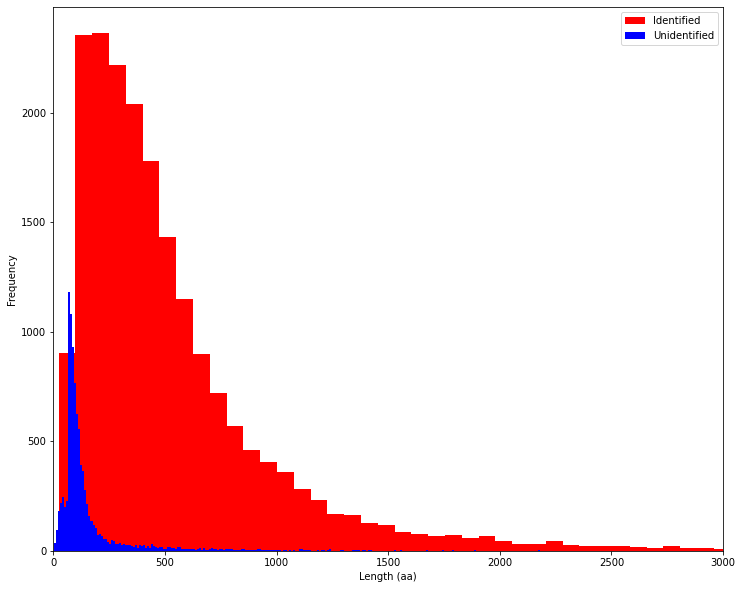

Total Number of Identified Sequences: 19634
Proportion of Identified Sequences Starting with Met: 0.9428542324539065
Total Number of Unidentified Sequences: 9938
Proportion of Unidentified Sequences Starting with Met: 0.6259810827128195



Number of Single Exon Genes: 687
Number of Identified Single Exon Genes: 685
Number of Unidentified Single Exon Genes: 2
Number of Two Exon Genes: 6256
Number of Identified Two Exon Genes: 2035
Number of Unidentified Two Exon Genes: 4220
Number of Three Plus Exon Genes: 22629
Number of Identified Three Plus Exon Genes: 16914
Number of Unidentified Three Plus Exon Genes: 5715


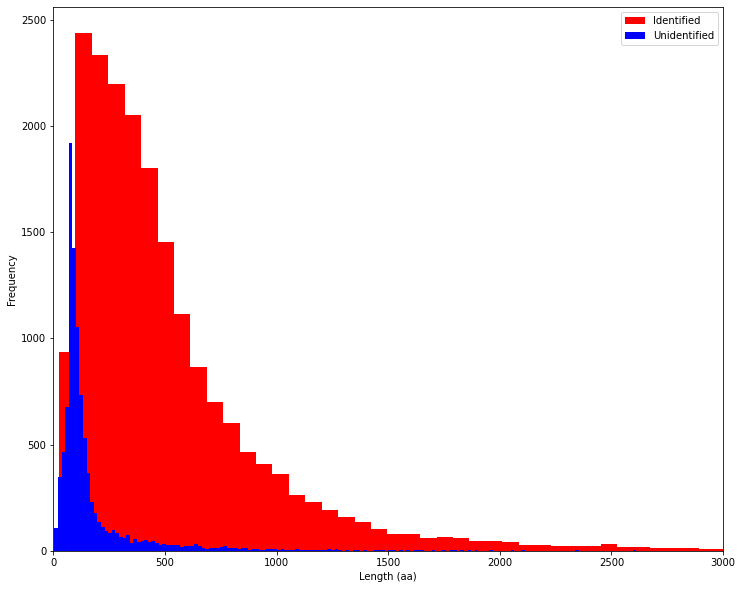

In [39]:
def identified_unidentified_comparison(identified, prot_fasta, gtf):
    identified_seq_lengths = []
    unidentified_seq_lengths = []
    identified_met_start = 0
    unidentified_met_start = 0
    single_exon_genes = []
    two_exon_genes = []
    three_plus_exon_genes = []
    single_identified, single_unidentified, double_identified, double_unidentified, three_plus_identified, three_plus_unidentified = 0,0,0,0,0,0
    
    with open(gtf, "r") as gtf:
        gtf_dict = {}
        for line in gtf:
            line = line.strip().split()
            if line[2] == 'transcript':
                pass
            else:
                trans_id = line[9].split('"')[1]
                if trans_id in gtf_dict:
                    gtf_dict[trans_id] += 1
                else:
                    gtf_dict[trans_id] = 1
        for item in gtf_dict:
            if gtf_dict[item] == 1:
                single_exon_genes.append(item)
            elif gtf_dict[item] == 2:
                two_exon_genes.append(item)
            else:
                three_plus_exon_genes.append(item)
                
                
    with open(prot_fasta, "r") as prot_fasta:
        header = ''
        seq = ''
        for line in prot_fasta:
            line = line.strip()
            if line.startswith(">"):
                if header != '':
                    if header in identified:
                        identified_seq_lengths.append(len(seq))
                        if seq.startswith('M'):
                            identified_met_start += 1
                        if header in single_exon_genes:
                            single_identified += 1
                        elif header in two_exon_genes:
                            double_identified += 1
                        else:
                            three_plus_identified += 1
                    else:
                        unidentified_seq_lengths.append(len(seq))
                        if seq.startswith('M'):
                            unidentified_met_start += 1
                        if header in single_exon_genes:
                            single_unidentified += 1
                        elif header in two_exon_genes:
                            double_unidentified += 1
                        else:
                            three_plus_unidentified += 1
                header = line.split(">")[1]
                seq = ''
            else:
                seq += line
        if header in identified:
            identified_seq_lengths.append(len(seq))
        else:
            unidentified_seq_lengths.append(len(seq))
            


    print("Total Number of Identified Sequences: {}".format(len(identified)))
    print("Proportion of Identified Sequences Starting with Met: {}".format(float(identified_met_start)/len(identified)))
    print("Total Number of Unidentified Sequences: {}".format(len(unidentified_seq_lengths)))
    print("Proportion of Unidentified Sequences Starting with Met: {}".format(float(unidentified_met_start)/len(unidentified_seq_lengths)))
    print("\n\n")
    print("Number of Single Exon Genes: {}".format(len(single_exon_genes)))
    print("Number of Identified Single Exon Genes: {}".format(single_identified))
    print("Number of Unidentified Single Exon Genes: {}".format(single_unidentified))
    print("Number of Two Exon Genes: {}".format(len(two_exon_genes)))
    print("Number of Identified Two Exon Genes: {}".format(double_identified))
    print("Number of Unidentified Two Exon Genes: {}".format(double_unidentified))
    print("Number of Three Plus Exon Genes: {}".format(len(three_plus_exon_genes)))
    print("Number of Identified Three Plus Exon Genes: {}".format(three_plus_identified))
    print("Number of Unidentified Three Plus Exon Genes: {}".format(three_plus_unidentified))
    
    fig = plt.figure()
    fig.set_size_inches(12,10)
    ax1 = fig.add_subplot()
    ax1.hist(identified_seq_lengths, color='red', label='Identified', bins=500)
    ax1.hist(unidentified_seq_lengths, color='blue', label='Unidentified', bins=500)
    ax1.set_xlim(0,3000)
    ax1.set_xlabel('Length (aa)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    plt.show()
    
identified_unidentified_comparison(ino_identified, '{}/REMOVE_SINGLE_EXON/ino_prot.fa'.format(wd), '{}/REMOVE_SINGLE_EXON/ino.filtered.retained.gtf'.format(wd))
identified_unidentified_comparison(marm_identified, '{}/REMOVE_SINGLE_EXON/marm_prot.fa'.format(wd), '{}/REMOVE_SINGLE_EXON/marm.filtered.retained.gtf'.format(wd))

## Renaming all genes and including functional analysis results

Up until this point all genes were being referenced by their locus ID generated by the gffcompare utility.  Here, I renamed all the genes into the format of Ino_##### and Marm_##### based on their location in the genome with the first gene on the largest chromosomes being Ino_00001.  These new IDs are then applied to the fasta files of the proteins and transcripts, all gff files, and any other files referencing genes in the annotation including the allele pair files.  Simultaneously, a functional annotation is being added to the gff file and fasta files describing the proteins function.  So instead of just the id in the header line it is now the id and function seperated by a tab.  An additional gene line is added to the gff file.  Below are the functions to do this. All final files can be found in "/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/FINAL_ANNOTATION/"

In [ ]:
def get_renames_and_function(gtf, prefix, blast, ipr, eggnog):
    genes = {}
    count = 1
    with open(gtf, 'r') as gtf:
        for line in gtf:
            line = line.split('\t')
            if line[2] == 'transcript':
                tmp_id = line[8].split('"')[1]
                if tmp_id in genes:
                    pass
                else:
                    gene_id = 'ERROR'
                    if int(count / 10) == 0: 
                        gene_id = "{}_0000{}".format(prefix, count)
                    elif int(count / 100) == 0:
                        gene_id = "{}_000{}".format(prefix, count)
                    elif int(count / 1000) == 0:
                        gene_id = "{}_00{}".format(prefix, count)
                    elif int(count / 10000) == 0:
                        gene_id = "{}_0{}".format(prefix, count)
                    else:
                        gene_id = '{}_{}'.format(prefix, count)
                    function = ''
                    if tmp_id in blast:
                        function += 'blast_id="{}";'.format(blast[tmp_id][0].replace(' ', '_'))
                    if tmp_id in ipr:
                        function += 'interproscan_id="{}";'.format(ipr[tmp_id][1].replace(' ', '_'))
                    if tmp_id in eggnog:
                        function += 'eggnog_id="{}"'.format(eggnog[tmp_id][0].replace(' ', '_').replace(';', '-'))    
                    genes[tmp_id] = [gene_id, function]
                    count += 1
    return genes

ino_genes = get_renames_and_function("{}/REMOVE_SINGLE_EXON/ino.filtered.retained.gtf".format(wd), 'Ino', ino_blast, ino_better_ipr, ino_egg)     
marm_genes = get_renames_and_function("{}/REMOVE_SINGLE_EXON/marm.filtered.retained.gtf".format(wd), 'Marm', marm_blast, marm_better_ipr, marm_egg)

def rename_fasta(genes, prot_fasta):
    out = prot_fasta.rsplit(".", maxsplit=1)[0] + ".named.fa"
    with open(prot_fasta, 'r') as prot_fasta, open(out, 'w') as out:
        for line in prot_fasta:
            if line.startswith(">"):
                line = line.strip().split(">")
                out.write(">{}\t{}\n".format(genes[line[1]][0], genes[line[1]][1]))
            else:
                out.write(line)
                
def rename_functional(genes, table):
    name = table.rsplit(".", maxsplit=1)
    table_out = name[0] + ".named." + name[1]
    with open(table, "r") as infile, open(table_out, "w") as outfile:
        for line in infile:
            if line.startswith("#"):
                outfile.write(line)
            else:
                line = line.strip().split("\t")
                line[0] = genes[line[0]][0]
                outfile.write('\t'.join(line) + '\n')

def rewrite_gtf(genes, gtf):
    gtf_out = gtf.rsplit(".", maxsplit=1)[0] + ".named.gtf"
    exon_count = 1
    with open(gtf, "r") as gtf, open(gtf_out, "w") as out:
        out.write("##gff-version 3.1.26\n")
        for line in gtf:
            line = line.strip().split('\t')
            line[1] = 'AUGUSTUS'
            tmp_id = line[8].split('"')[1]
            line[8] = 'ID=exon_{};Parent={}.t1'.format(exon_count, genes[tmp_id][0])
            if line[2] == 'transcript':
                line[8] = 'ID={}.t1;gene_id={};{}'.format(genes[tmp_id][0], genes[tmp_id][0], genes[tmp_id][1])
                out.write('\t'.join(line) + "\n")
                line[2] = 'gene'
                line[8] = 'ID={};{}'.format(genes[tmp_id][0], genes[tmp_id][1])
                out.write('\t'.join(line) + "\n")
            else:
                out.write('\t'.join(line) + "\n")
                exon_count += 1
            
def rename_rbh(genes, column, rbh, stats):
    rbh_new = rbh.rsplit(".", maxsplit=1)[0] + '.named.txt'
    stats_new = stats.rsplit(".", maxsplit=1)[0] + '.named.txt'
    column = int(column)
    with open(rbh, "r") as rbh, open(rbh_new, "w") as new:
        linecount = 0
        for line in rbh:
            if linecount == 0:
                pass
            else:
                line = line.strip().split()
                line[column] = genes[line[column]][0]
                new.write('\t'.join(line) + '\n')
            linecount+=1
    
    with open(stats, "r") as stats, open(stats_new, "w") as new:
        linecount = 0
        for line in stats:
            if linecount == 0:
                new.write(line)
            else:
                stats = line.strip().split()
                stats[column] = genes[stats[column]][0]
                new.write('\t'.join(stats) + '\n')
            linecount += 1
            


def rename_files(genes, prot_fasta, trans_fasta, blast, ipr, eggnog, gtf):
    out = prot_fasta.rsplit(".", maxsplit=1)[0] + ".named.fa"
    rename_fasta(genes, prot_fasta)
    rename_fasta(genes, trans_fasta)
    rename_functional(genes, blast)
    rename_functional(genes, ipr)
    rename_functional(genes, eggnog)
    rewrite_gtf(genes, gtf)

    

wd="/lustre/miifs03/scratch/m2_jgu-tipton/nd/annotation/AUGUSTUS-CGP/AUGUSTUS_WITH_HINTS_NEW/RNA_SEQ/FINAL/MERGED_READS_v2/"
rename_files(ino_genes, "{}/REMOVE_SINGLE_EXON/ino_prot.fa".format(wd), "{}/REMOVE_SINGLE_EXON/ino_trans.fa".format(wd), "{}/FUNCTIONAL_ANNOTATION/Ino.outfmt6".format(wd), "{}/FUNCTIONAL_ANNOTATION/ino_ipr.tsv".format(wd), "{}/FUNCTIONAL_ANNOTATION/ino_eggnog.emapper.annotations".format(wd), "{}/REMOVE_SINGLE_EXON/ino.filtered.retained.gtf.sorted".format(wd)) 
rename_files(marm_genes, "{}/REMOVE_SINGLE_EXON/marm_prot.fa".format(wd), "{}/REMOVE_SINGLE_EXON/marm_trans.fa".format(wd), "{}/FUNCTIONAL_ANNOTATION/Marm.outfmt6".format(wd), "{}/FUNCTIONAL_ANNOTATION/marm_ipr.tsv".format(wd), "{}/FUNCTIONAL_ANNOTATION/marm_eggnog.emapper.annotations".format(wd), "{}/REMOVE_SINGLE_EXON/marm.filtered.retained.gtf.sorted".format(wd)) 
rename_rbh(ino_genes, 0, "{}/ALLELE_PAIRS/rbh.txt".format(wd), "{}/ALLELE_PAIRS/stats.txt".format(wd))
rename_rbh(marm_genes, 1, "{}/ALLELE_PAIRS/rbh.named.txt".format(wd), "{}/ALLELE_PAIRS/stats.named.txt".format(wd))

